In [1]:
import pandas as pd

df = pd.read_csv("/share/u/kevin/DiffusionConceptErasure/src/classifier_results/evaluations/evaluation_averaged.csv")
df

,erasing_type,concept,probe,clip_score,classifier_top1_acc,classifier_top5_acc
0,esdu,airliner,noisebasedprobe_cls,27.861995,100.000000,100.000000
1,esdu,airliner,noisebasedprobe_nocls,26.810207,66.666667,83.333333
2,esdu,airliner,standardpromptprobe,20.263670,0.000000,0.000000
3,esdu,airliner,standardpromptprobe_cls,27.378557,96.666667,96.666667
4,esdx,airliner,noisebasedprobe_cls,27.900563,100.000000,100.000000
...,...,...,...,...,...,...
67,stereo,golf_ball,standardpromptprobe_cls,21.721069,3.333333,16.666667
68,uce,golf_ball,noisebasedprobe_cls,26.622369,83.333333,86.666667
69,uce,golf_ball,noisebasedprobe_nocls,23.642972,56.666667,80.000000
70,uce,golf_ball,standardpromptprobe,20.924312,0.000000,0.000000


/tmp/ipykernel_1884363/1197178587.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


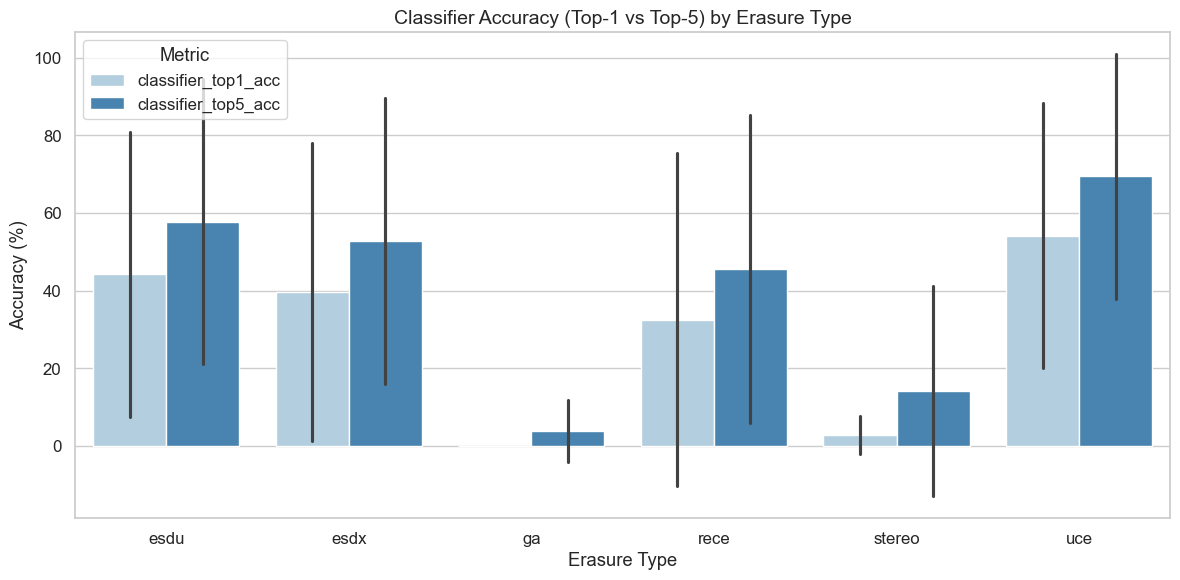

/tmp/ipykernel_1884363/1197178587.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


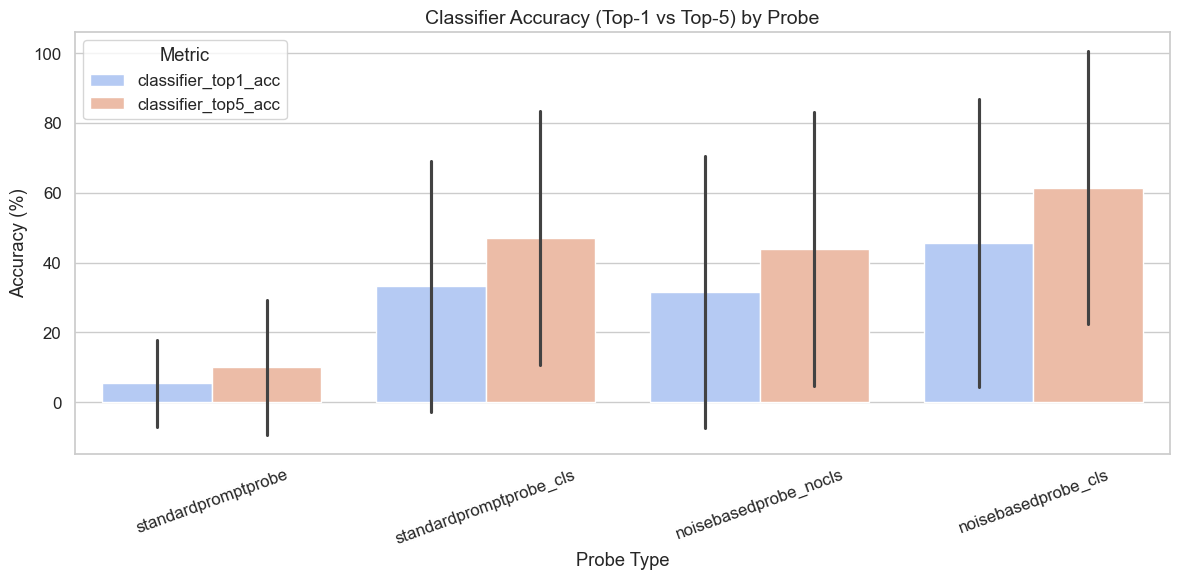

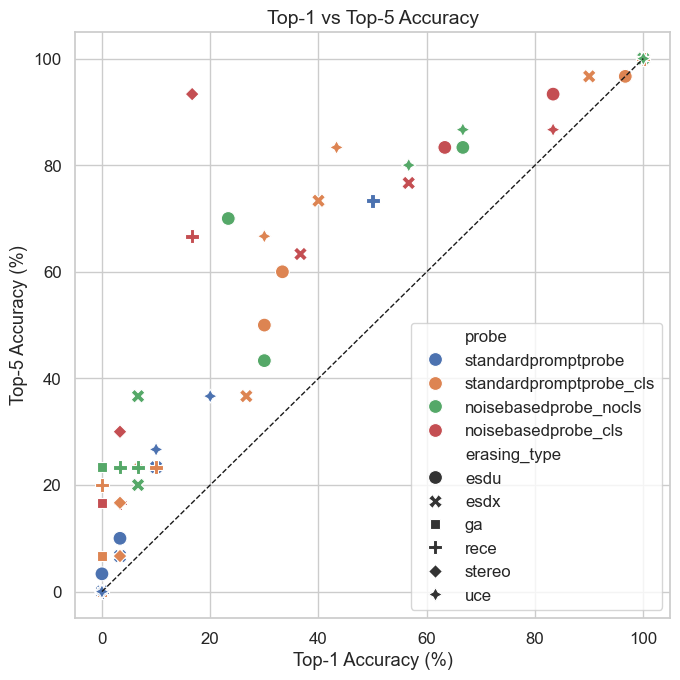

/tmp/ipykernel_1884363/1197178587.py:87: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


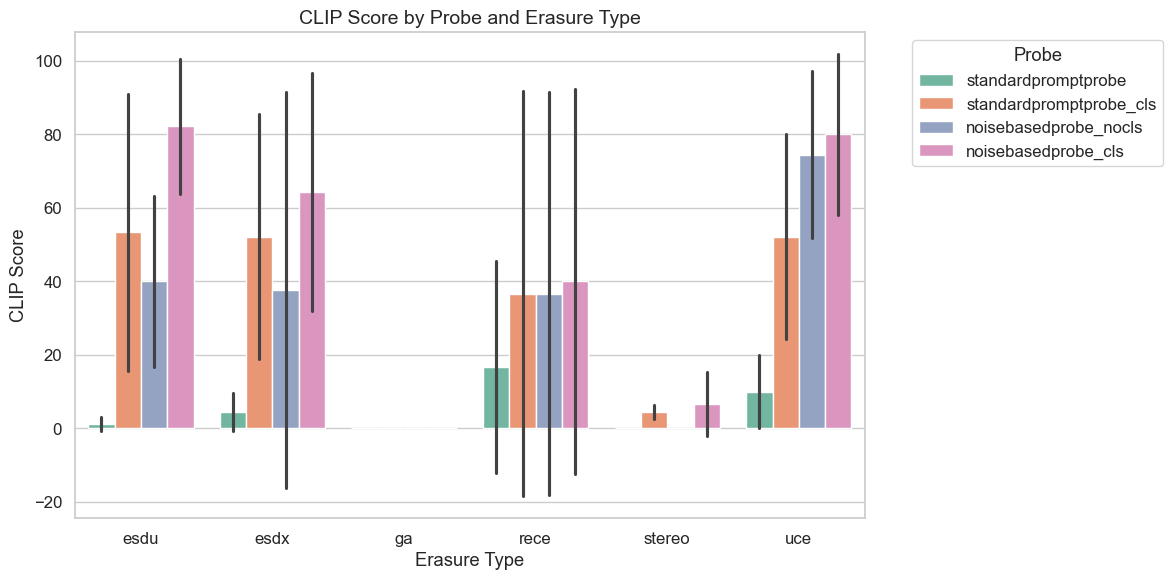

/tmp/ipykernel_1884363/1197178587.py:103: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


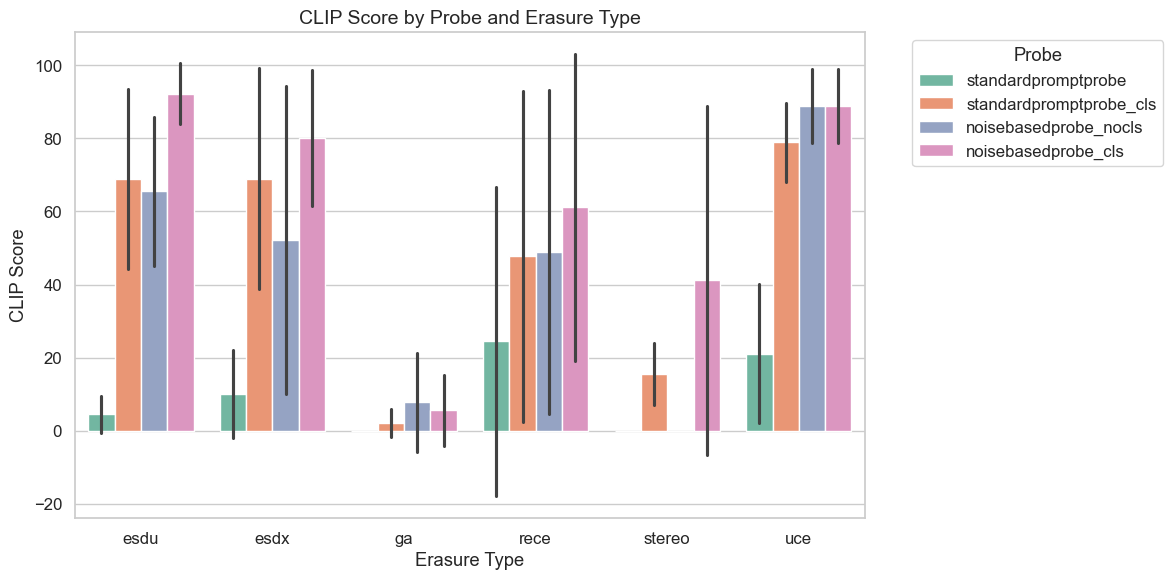

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set consistent probe order for aesthetics
probe_order = [
    "standardpromptprobe",
    "standardpromptprobe_cls",
    "noisebasedprobe_nocls",
    "noisebasedprobe_cls",
]
df["probe"] = pd.Categorical(df["probe"], categories=probe_order, ordered=True)

sns.set(style="whitegrid", font_scale=1.1)

# ---------------------------------------------------------------------
# 1️⃣ Top-1 vs Top-5 Accuracy side-by-side
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.melt(
        id_vars=["erasing_type", "concept", "probe"],
        value_vars=["classifier_top1_acc", "classifier_top5_acc"],
        var_name="metric",
        value_name="accuracy"
    ),
    x="erasing_type",
    y="accuracy",
    hue="metric",
    ci="sd",
    palette="Blues"
)
plt.title("Classifier Accuracy (Top-1 vs Top-5) by Erasure Type", fontsize=14)
plt.xlabel("Erasure Type")
plt.ylabel("Accuracy (%)")
plt.legend(title="Metric", loc="upper left")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 2️⃣ Compare Top-1 and Top-5 across probes
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.melt(
        id_vars=["probe", "erasing_type"],
        value_vars=["classifier_top1_acc", "classifier_top5_acc"],
        var_name="metric",
        value_name="accuracy"
    ),
    x="probe",
    y="accuracy",
    hue="metric",
    ci="sd",
    palette="coolwarm"
)
plt.title("Classifier Accuracy (Top-1 vs Top-5) by Probe", fontsize=14)
plt.xlabel("Probe Type")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=20)
plt.legend(title="Metric", loc="upper left")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 3️⃣ Scatter: Top-1 vs Top-5 per (erasing_type, probe, concept)
# ---------------------------------------------------------------------
plt.figure(figsize=(7, 7))
sns.scatterplot(
    data=df,
    x="classifier_top1_acc",
    y="classifier_top5_acc",
    hue="probe",
    style="erasing_type",
    s=100,
)
plt.plot([0, 100], [0, 100], "k--", lw=1)  # diagonal reference
plt.title("Top-1 vs Top-5 Accuracy", fontsize=14)
plt.xlabel("Top-1 Accuracy (%)")
plt.ylabel("Top-5 Accuracy (%)")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 4️⃣ (Optional) CLIP score context
# ---------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="erasing_type",
    y="classifier_top1_acc",
    hue="probe",
    ci="sd",
    palette="Set2"
)
plt.title("CLIP Score by Probe and Erasure Type", fontsize=14)
plt.xlabel("Erasure Type")
plt.ylabel("CLIP Score")
plt.legend(title="Probe", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="erasing_type",
    y="classifier_top5_acc",
    hue="probe",
    ci="sd",
    palette="Set2"
)
plt.title("CLIP Score by Probe and Erasure Type", fontsize=14)
plt.xlabel("Erasure Type")
plt.ylabel("CLIP Score")
plt.legend(title="Probe", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Suppose your DataFrame is named df
# Normalize names for readability
df["erasing_type"] = df["erasing_type"].str.upper().replace({
    "ESDX": "ESD-X",
    "ESDU": "ESD-U"
})
df["probe_clean"] = df["probe"].replace({
    "noisebasedprobe_cls": "Noise-Based Probing CLS (↓)",
    "noisebasedprobe_nocls": "Noise-Based Probing (↓)",
    "standardpromptprobe": "Standard Prompt Probing (↓)",
    "standardpromptprobe_cls": "Standard Prompt Probing CLS(↓)"
})

# --- Aggregate mean across all concepts ---
agg = (
    df.groupby(["probe_clean", "erasing_type"])
      .agg({
          "clip_score": "mean",
          "classifier_top1_acc": "mean"
      })
      .reset_index()
)

# --- Round for readability ---
agg["clip_score"] = agg["clip_score"].round(1)
agg["classifier_top1_acc"] = agg["classifier_top1_acc"].round(1)

# --- Pivot to table layout ---
table_clip = agg.pivot(index="probe_clean", columns="erasing_type", values="clip_score")
table_acc  = agg.pivot(index="probe_clean", columns="erasing_type", values="classifier_top1_acc")

# --- Merge to one printable format ---
table = pd.concat(
    [table_clip.add_prefix("CLIP_"), table_acc.add_prefix("ACC_")],
    axis=1
)

print(table)


erasing_type                    CLIP_ESD-U  CLIP_ESD-X  CLIP_GA  CLIP_RECE  \
probe_clean                                                                  
Standard Prompt Probing (↓)           19.9        19.9     24.1       20.4   
Standard Prompt Probing CLS(↓)        25.3        26.0     24.9       24.0   
Noise-Based Probing (↓)               24.7        25.4     24.9       23.5   
Noise-Based Probing CLS (↓)           27.3        28.6     25.0       25.4   

erasing_type                    CLIP_STEREO  CLIP_UCE  ACC_ESD-U  ACC_ESD-X  \
probe_clean                                                                   
Standard Prompt Probing (↓)            18.1      22.2        1.1        4.4   
Standard Prompt Probing CLS(↓)         22.8      25.8       53.3       52.2   
Noise-Based Probing (↓)                19.9      26.4       40.0       37.8   
Noise-Based Probing CLS (↓)            23.9      27.3       82.2       64.4   

erasing_type                    ACC_GA  ACC_RECE  ACC_ST

/tmp/ipykernel_1884363/1166542841.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["probe_clean"] = df["probe"].replace({
/tmp/ipykernel_1884363/1166542841.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["probe_clean", "erasing_type"])
